## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path =r'/Users/juliapetke/Desktop/Julia Petke- Boat Sale'

In [4]:

df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'Boat Sale_cleaned.csv'), index_col = False)

In [5]:
df.shape

(6589, 10)

In [6]:
df.head()

,Currency,Price,Boat Type,Manufacturer,Type,Year Built,Material,Location,Number of views last 7 days,Country
0,EUR,3490,Center console boat,Terhi power boats,new boat from stock,2020,Thermoplastic,Germany » Bönningstedt,75,Germany
1,EUR,3399,Fishing Boat,Linder power boats,new boat from stock,2019,Aluminium,Germany » Bayern » München,58,Germany
2,CHF,3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,GRP,Switzerland » Seengen,239,Switzerland
3,EUR,3500,Sport Boat,GS Nautica power boats,Used boat,2004,GRP,Italy » Lake Garda » Moniga del Garda (BS),69,Italy
4,CHF,4600,Runabout,Kimple power boats,new boat from stock,2020,Aluminium,Switzerland » Zugersee » Neuheim,113,Switzerland


In [7]:
df.rename(columns = {'Number of views last 7 days' : 'Number of views'}, inplace = True)

In [9]:
df.dtypes

Currency           object
Price               int64
Boat Type          object
Manufacturer       object
Type               object
Year Built          int64
Material           object
Location           object
Number of views     int64
Country            object
dtype: object

### 2. The elbow technique

In [19]:
# Check data types of each column
print(df.dtypes)

# Alternatively, you can check if there are any non-numeric values
print(df.applymap(lambda x: isinstance(x, (int, float))).all())

Currency            object
Price              float64
Boat Type           object
Manufacturer        object
Type                object
Year Built           int64
Material            object
Location            object
Number of views      int64
Country             object
dtype: object
Currency           False
Price               True
Boat Type          False
Manufacturer       False
Type               False
Year Built          True
Material           False
Location           False
Number of views     True
Country            False
dtype: bool


/var/folders/zd/kwmllg996knd4mqrwq8n_vf80000gp/T/ipykernel_10769/2061095188.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df.applymap(lambda x: isinstance(x, (int, float))).all())


In [24]:
# One-hot encoding the categorical columns
df_encoded = pd.get_dummies(df, columns=['Boat Type', 'Manufacturer', 'Type', 'Material', 'Location', 'Country'])

# Verify if the data is now all numeric
print(df_encoded.dtypes)

Currency                             object
Price                               float64
Year Built                            int64
Number of views                       int64
Boat Type_Bowrider                     bool
                                     ...   
Country_Zürichse, 8855 Wangen SZ       bool
Country_annecy                         bool
Country_baden baden                    bool
Country_bodensee                       bool
Country_espa?a                         bool
Length: 3371, dtype: object


In [28]:
#Create a correlation matrix using pandas
# Convert 'Price' to numeric (if they are stored as int type)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


In [29]:
print(df_encoded.dtypes)

Currency                             object
Price                               float64
Year Built                            int64
Number of views                       int64
Boat Type_Bowrider                     bool
                                     ...   
Country_Zürichse, 8855 Wangen SZ       bool
Country_annecy                         bool
Country_baden baden                    bool
Country_bodensee                       bool
Country_espa?a                         bool
Length: 3371, dtype: object


In [31]:
df_encoded = df.drop(['Currency'], axis=1)


In [32]:
df_encoded = pd.get_dummies(df_encoded, columns=['Boat Type', 'Manufacturer', 'Type', 'Material', 'Location', 'Country'])

In [33]:
print(df_encoded.dtypes)

Price                                      float64
Year Built                                   int64
Number of views                              int64
Boat Type_Bowrider                            bool
Boat Type_Bowrider,Cabin Boat,Deck Boat       bool
                                            ...   
Country_Zürichse, 8855 Wangen SZ              bool
Country_annecy                                bool
Country_baden baden                           bool
Country_bodensee                              bool
Country_espa?a                                bool
Length: 3370, dtype: object


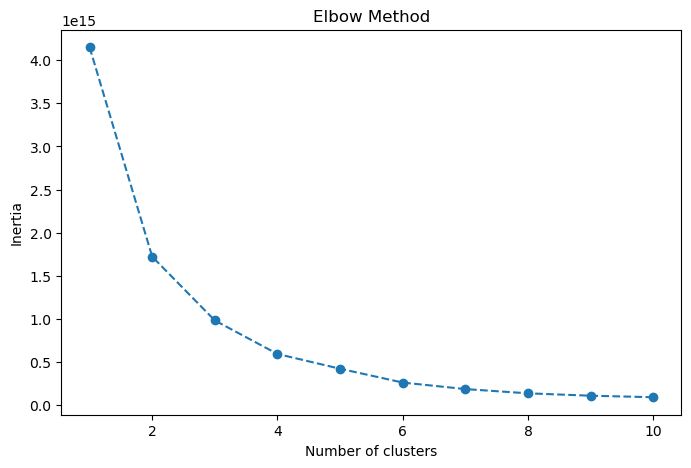

In [34]:
inertia = []

# Try different numbers of clusters (e.g., from 1 to 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_encoded)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#####  The elbow method plot suggests that the optimal number of clusters for your data is 3. This is where the steep drop in inertia levels off, indicating that adding more clusters beyond 3 doesn't significantly improve the clustering quality.

### 3. k-means clustering

In [40]:
# Run K-Means Algorithm
# Initialize KMeans with the optimal number of clusters (in this case, 3)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans algorithm on the encoded dataframe
kmeans.fit(df_encoded)

# Add the cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_


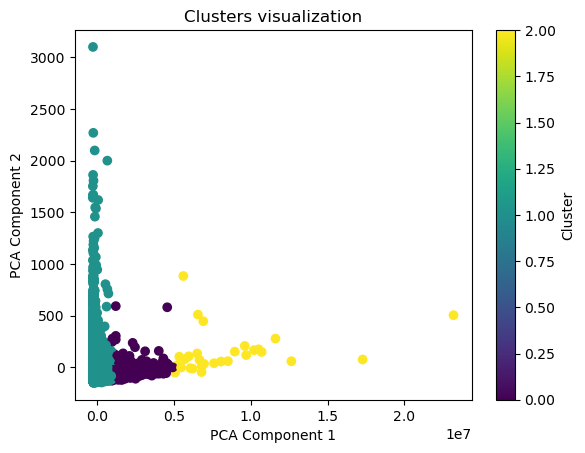

In [41]:
# Visualize the Clusters
from sklearn.decomposition import PCA

# Reduce data to 2 dimensions using PCA for visualization purposes
pca = PCA(2)
df_pca = pca.fit_transform(df_encoded)

# Create a scatter plot of the clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Clusters visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [42]:
#Check the Dataframe
df.head()

,Currency,Price,Boat Type,Manufacturer,Type,Year Built,Material,Location,Number of views,Country,Cluster
0,EUR,3490.0,Center console boat,Terhi power boats,new boat from stock,2020,Thermoplastic,Germany » Bönningstedt,75,Germany,1
1,EUR,3399.0,Fishing Boat,Linder power boats,new boat from stock,2019,Aluminium,Germany » Bayern » München,58,Germany,1
2,CHF,3500.0,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,GRP,Switzerland » Seengen,239,Switzerland,1
3,EUR,3500.0,Sport Boat,GS Nautica power boats,Used boat,2004,GRP,Italy » Lake Garda » Moniga del Garda (BS),69,Italy,1
4,CHF,4600.0,Runabout,Kimple power boats,new boat from stock,2020,Aluminium,Switzerland » Zugersee » Neuheim,113,Switzerland,1


### Create a few different visualizations

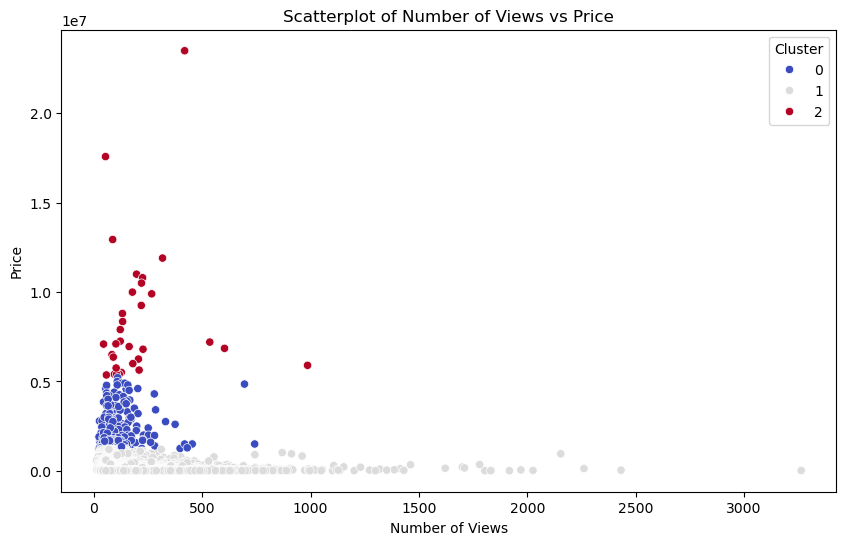

In [45]:
# Scatterplot of Number of Views vs Price, colored by clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Number of views'], y=df['Price'], hue=df['Cluster'], palette='coolwarm')
plt.title('Scatterplot of Number of Views vs Price')
plt.xlabel('Number of Views')
plt.ylabel('Price')
plt.legend(title='Cluster')
plt.show()

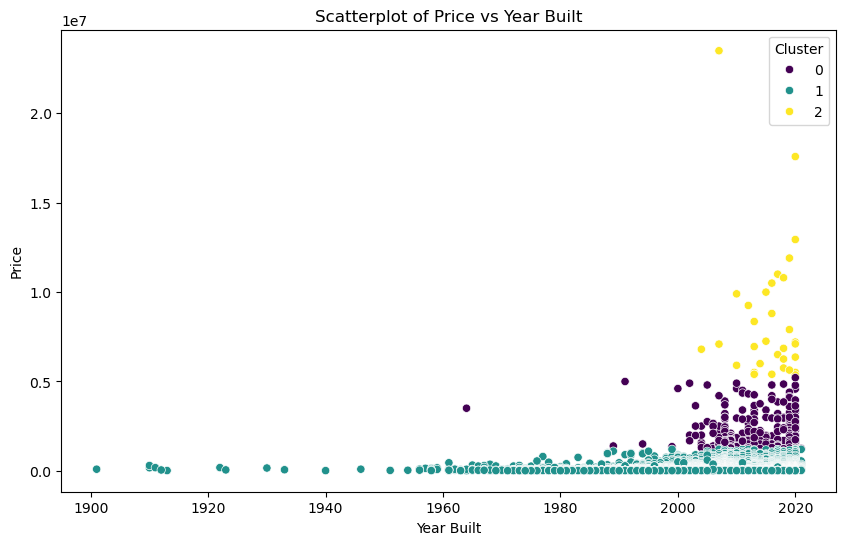

In [44]:
# Scatterplot of Price vs Year Built, colored by clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Year Built'], y=df['Price'], hue=df['Cluster'], palette='viridis')
plt.title('Scatterplot of Price vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.legend(title='Cluster')
plt.show()

The scatterplot displays the distribution of Price versus Year Built, with data points color-coded based on the clusters assigned by the k-means algorithm. Here's the interpretation of the clusters and an analysis of whether they make sense:

### Cluster 0 (Purple):

Interpretation: This cluster mainly includes older boats, built between the 1950s and early 2000s, with relatively lower prices (typically under 500,000).

Why this makes sense: These boats are likely depreciated in value due to their age, making them less expensive. This cluster appears to represent a segment of older, low-priced boats.

### Cluster 1 (Teal):

Interpretation: Cluster 1 includes boats spanning a wide range of years (from the early 1900s to recent builds), but they all fall in the lower price range (below 500,000).

Why this makes sense: These boats might be smaller, less luxurious, or older models that are still low in cost. The cluster likely captures boats that, regardless of age, are affordable and not in high demand.

### Cluster 2 (Yellow):

Interpretation: This cluster is primarily composed of boats built after the 2000s, with significantly higher prices, some reaching over 2 million.

Why this makes sense: These are likely newer, more luxurious boats with modern features and designs, making them more expensive. This cluster represents the high-end segment of the boat market.

### What Works:

The clusters seem logical because they reflect key factors such as price and age of the boat. Cluster 2 groups more recent, high-priced boats, while clusters 0 and 1 separate older, lower-priced boats from more affordable recent ones.

### Potential Issues or Insights:

Overlap between Clusters 0 and 1: Both clusters contain boats from the same time periods (1900–2000) with similar price ranges, suggesting that they aren't entirely distinct. This indicates that further refinement may be needed.

### Cluster 1 (Teal):

This cluster covers a wide range of years, which could imply that price is the dominant factor here, overshadowing other important distinctions like boat features or type.

#### Next Steps for Refinement:

Include Additional Variables: Adding more features, such as Boat Type, Length, or Country, could lead to more precise clustering and better separation between groups.

Experiment with Other Algorithms: Testing different clustering methods, like hierarchical clustering or Gaussian Mixture Models (GMM), might yield more distinct groupings.

Dimensionality Reduction: Applying techniques like Principal Component Analysis (PCA) could help visualize the data more effectively and highlight underlying patterns that aren't apparent in the current plot.

In summary, while the clusters seem to reflect general trends in price and age, there’s potential for further improvement. Including more features and refining the clustering algorithm could provide more meaningful insights.

In [52]:
# Grouping the data by cluster and calculating descriptive statistics
cluster_stats = df.groupby('Cluster').describe()

# Display the summary statistics for the clusters
print(cluster_stats)

          Price                                                               \
          count          mean           std        min        25%        50%   
Cluster                                                                        
0         238.0  2.260516e+06  9.771620e+05  1222776.0  1500000.0  1947500.0   
1        6318.0  1.743914e+05  2.111518e+05     3399.0    43000.0    89000.0   
2          33.0  8.381911e+06  3.845876e+06  5360625.0  5900000.0  7087500.0   

                               Year Built               ...                  \
               75%         max      count         mean  ...     75%     max   
Cluster                                                 ...                   
0        2776250.0   5208850.0      238.0  2012.827731  ...  2018.0  2021.0   
1         219500.0   1203950.0     6318.0  2006.520734  ...  2018.0  2021.0   
2        9900000.0  23500000.0       33.0  2015.454545  ...  2019.0  2020.0   

        Number of views                     

In [55]:
df.groupby('Cluster').agg({'Price':['mean', 'median'], 
                         'Year Built':['mean', 'median'], 
                         'Number of views':['mean', 'median']})

Price              Year Built         Number of views       
                 mean     median         mean  median            mean median
Cluster                                                                     
0        2.260516e+06  1947500.0  2012.827731  2013.0      115.201681   94.5
1        1.743914e+05    89000.0  2006.520734  2008.0      163.334283  113.0
2        8.381911e+06  7087500.0  2015.454545  2016.0      207.060606  133.0

# Potential Use Cases for Clustered Data in Future Analytics Pipeline:

The clustering results can be highly useful in various stages of an analytics pipeline. They enable targeted marketing and customer segmentation, where personalized campaigns and offers can be developed for each cluster. The data can also guide pricing strategies, allowing for dynamic pricing models based on demand in each cluster.

In inventory management, businesses can optimize stock levels and supply chains according to cluster-specific demand. Additionally, product development can be informed by the preferences revealed in each cluster, allowing for feature prioritization and differentiated product offerings.

The results help forecast sales, identify cross-sell and upsell opportunities, and drive more accurate revenue projections. Lastly, clustering insights can enhance predictive modeling and recommendation systems, leading to better customer engagement and decision-making.